In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

raw_data = pd.read_excel('titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [97]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


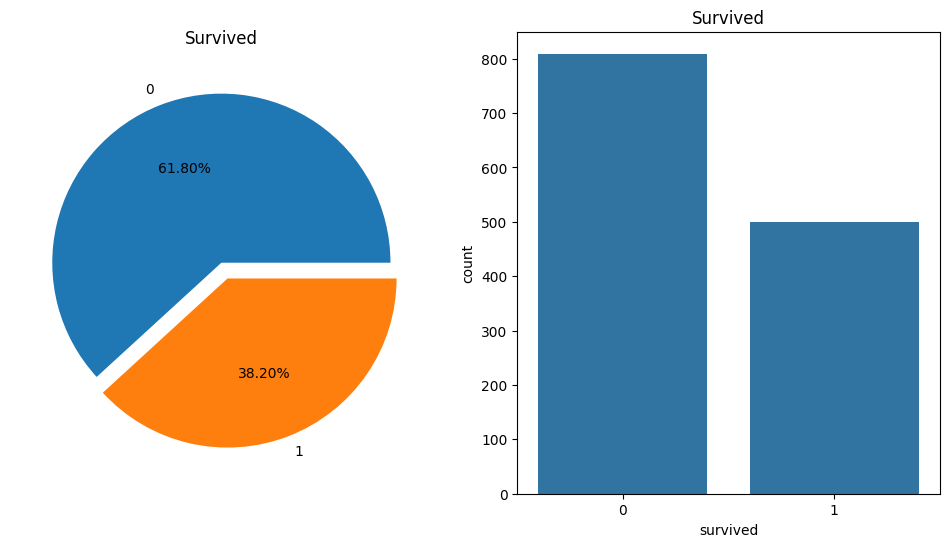

In [98]:
f, ax = plt.subplots(1,2,figsize=(12,6))
raw_data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<Axes: >

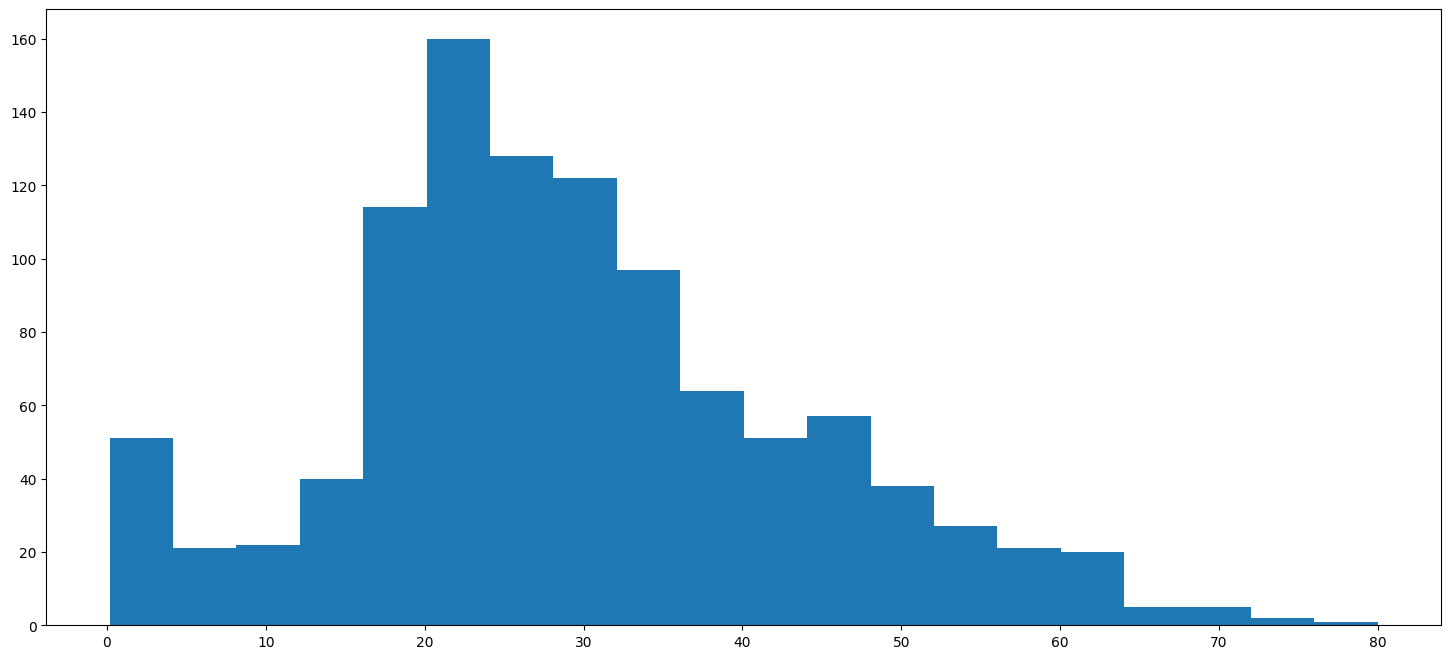

In [99]:
raw_data['age'].hist(bins=20, figsize=(18,8), grid=False)

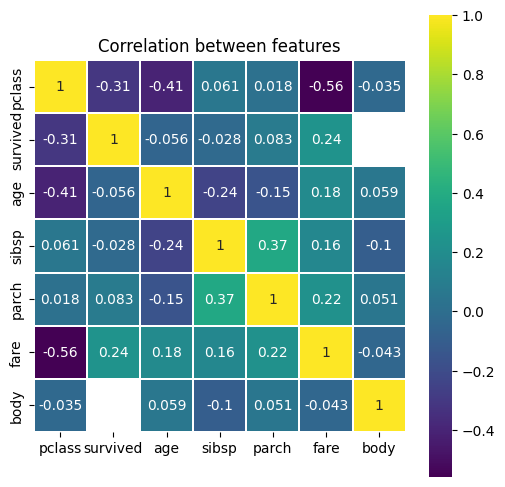

In [100]:
plt.figure(figsize=(6,6))
numeric_data = raw_data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

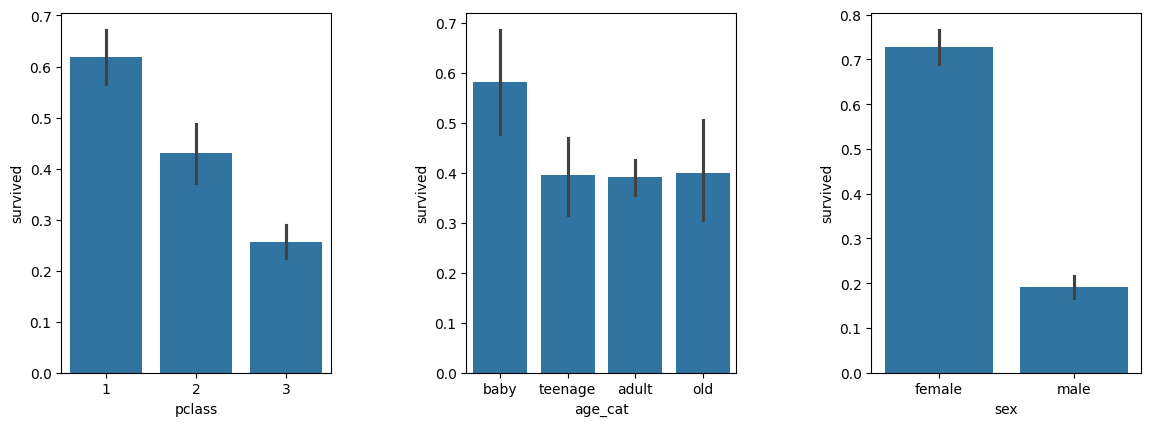

In [101]:
raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0,10,20,50,100],
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=raw_data)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=raw_data)
plt.subplot(133)
sns.barplot(x='sex', y='survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show

In [102]:
# Pre-processing
tmp = []
for each in raw_data['sex']:
  if each == 'female':
    tmp.append(1)
  elif each == 'male':
    tmp.append(0)
  else :
    tmp.append(np.nan)

raw_data['sex'] = tmp

In [103]:
for each in ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare']:
  raw_data[each] = raw_data[each].astype('float')

In [104]:
for each in ['age', 'sibsp', 'parch', 'fare']:
  raw_data = raw_data[raw_data[each].notnull()]

In [105]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [106]:
x_data = raw_data.values[:, [0,3,4,5,6,8]]
y_data = raw_data.values[:, [1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

from keras.models import Sequential
from keras.layers import Dense
np.random.seed(7)

model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 255)               1785      
                                                                 
 dense_5 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2041 (7.97 KB)
Trainable params: 2041 (7.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


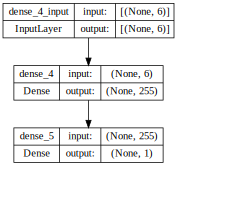

In [107]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [108]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
30/30 [==============================] - 1s 9ms/step - loss: 0.2218 - accuracy: 0.6649 - val_loss: 0.1860 - val_accuracy: 0.7524
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 0.2069 - accuracy: 0.7032 - val_loss: 0.1761 - val_accuracy: 0.7619
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.7489 - val_loss: 0.1758 - val_accuracy: 0.7524
Epoch 4/200
30/30 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.7362 - val_loss: 0.1778 - val_accuracy: 0.7429
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.1696 - accuracy: 0.7681 - val_loss: 0.1689 - val_accuracy: 0.7905
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.7723 - val_loss: 0.1612 - val_accuracy: 0.8000
Epoch 7/200
30/30 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.7628 - val_loss: 0.1945 - val_accuracy: 0.7048
Epoch 8/200
3

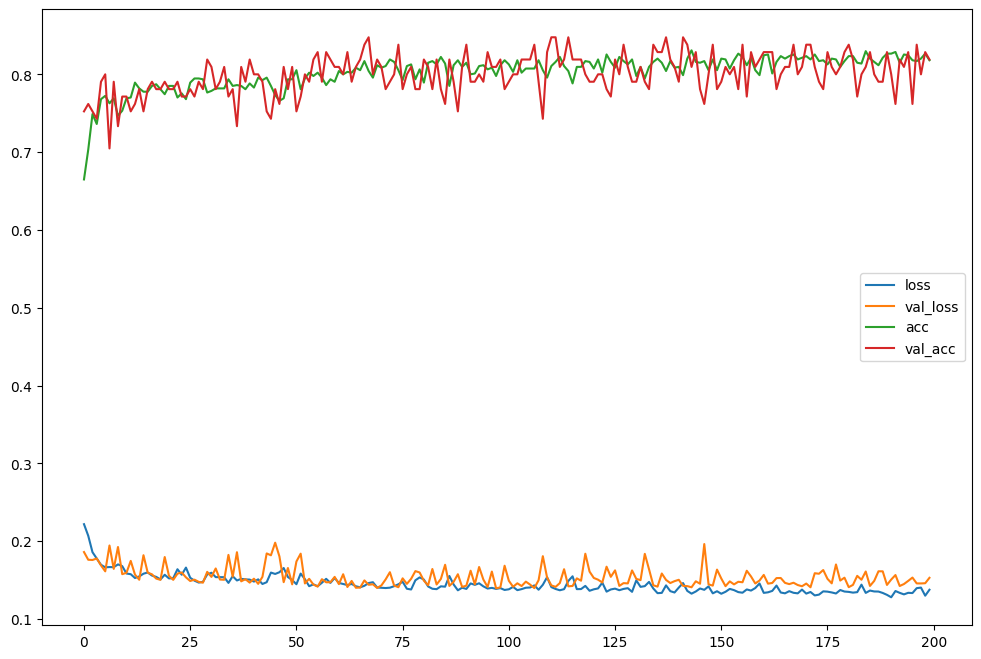

In [109]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'acc', 'val_acc'])
plt.show()

In [110]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)

In [111]:
model.predict(dicaprio)

1/1 [==============================] - 0s 57ms/step


array([[0.16633102]], dtype=float32)

In [112]:
model.predict(winslet)

1/1 [==============================] - 0s 20ms/step


array([[0.9933701]], dtype=float32)